In [1]:
#
# Working through the example from
# https://github.com/kwmcbride/kipet/blob/new_data/kipet/new_examples/Ex_7_concentration_input.py
#

In [2]:
import sys
from kipet import KipetModel

import matplotlib.pyplot as plt

In [3]:
kipet_model = KipetModel()

r1 = kipet_model.new_reaction('reaction-1')   

# Add the model parameters
r1.add_parameter('k1', init=2.0, bounds=(0.0, 5.0))
r1.add_parameter('k2', init=0.2, bounds=(0.0, 2.0))

# Declare the components and give the initial values
r1.add_component('A', state='concentration', init=0.001)
r1.add_component('B', state='concentration', init=0.0)
r1.add_component('C', state='concentration', init=0.0)

In [4]:
# Use this function to replace the old filename set-up
filename = r1.set_directory('Ex_1_C_data.txt')
filename

the dir is: /home/paperspace/learn_kipet/data_sets
/home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt


PosixPath('/home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt')

In [5]:
r1.add_dataset('C_data', category='concentration', file=filename)

the dir is: /home/paperspace/learn_kipet/data_sets
/home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt
read dir : /home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt


In [7]:
#filename = '/home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt'

In [8]:
#r1.add_dataset('C_data', category='concentration', file=filename)

/home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-packages
read dir : /home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt


In [6]:
# Define the reaction model
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']
    exprs['B'] = m.P['k1']*m.Z[t,'A']-m.P['k2']*m.Z[t,'B']
    exprs['C'] = m.P['k2']*m.Z[t,'B']
    return exprs 

r1.add_equations(rule_odes)

In [7]:
# Settings
r1.settings.collocation.nfe = 60

In [8]:
# Run KIPET
r1.settings.solver.linear_solver = 'ma27'
r1.run_opt() 

0 9.9687
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) t


RESULTS
Z:
                  A         B             C
0.000000  0.001000  0.000000  0.000000e+00
0.005163  0.000999  0.000001  3.054340e-09
0.021477  0.000995  0.000005  5.248336e-08
0.033300  0.000993  0.000007  1.255593e-07
0.038479  0.000991  0.000008  1.672911e-07
...            ...       ...           ...
9.923477  0.000107  0.000030  8.625364e-04
9.935300  0.000107  0.000030  8.629017e-04
9.940479  0.000107  0.000030  8.630613e-04
9.956841  0.000106  0.000030  8.635646e-04
9.968700  0.000106  0.000030  8.639282e-04

[898 rows x 3 columns]

Cm:
                A         B         C
0.0000  0.001027  0.000000  0.000013
0.0333  0.001015  0.000002  0.000021
0.0667  0.001007  0.000013  0.000018
0.1000  0.000993  0.000025  0.000014
0.1334  0.000982  0.000035  0.000012
...          ...       ...       ...
9.8353  0.000103  0.000043  0.000859
9.8686  0.000104  0.000042  0.000857
9.9020  0.000103  0.000041  0.000859
9.9353  0.000101  0.000043  0.000860
9.9687  0.000103  0.000038  0.0008

In [13]:
# Display the results
r1.results.show_parameters


The estimated parameters are:
k1 0.22508232435938366
k2 1.020094687930803


In [9]:
r1.results.plot()

Plot saved as: /home/paperspace/learn_kipet/charts/chart_9384.html


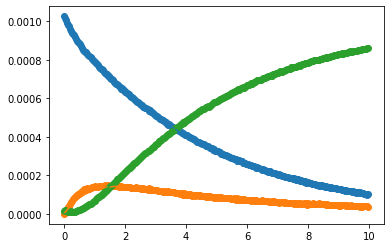

In [10]:
fig, ax = plt.subplots()
for c in ['A','B','C']:
    ax.plot(r1.results.Z.index, r1.results.Z[c])
    ax.scatter(r1.results.Cm.index, r1.results.Cm[c])